*Future To Do List*:
    1. Functions for making the difference histograms of the gaussian blurs
    2. Functions to Concatenate these images
    2. Get a program for obtaining the appropriate bin number and width
    3. Go through an properly markdown my work
    4. Advanced patterning? 
    5. Functionalization of everything
    

*Step 1: Importing necessary packages*

In [1]:
from PIL import Image, ImageFilter
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy
from scipy.ndimage import gaussian_filter
import MultiresHist as mult
import timeit

*Step 2: Defining Constants*

In [2]:
#List of the number of bins you want for the histograms
bin_list = [3]

#List for the gaussian blur sigma variable
gauss_blur_list = [0,1]

*Step 2: saving the image*

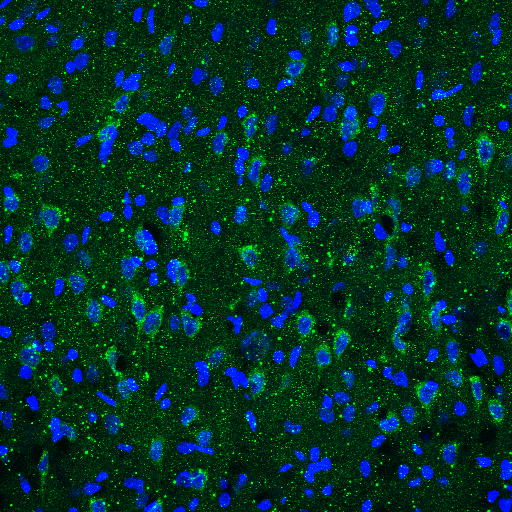

In [3]:
#Opens the image and saves as a variable the convert ('L') allows us to convert to greyscale
im =  Image.open("/Users/HawleyHelm/Desktop/P35_LPS_ipsi_40x_zstack_cells_MaxIP.png")
im

*Step 3:Splitting the image by r, g, b colors*

In [4]:
r,g,b = im.split()

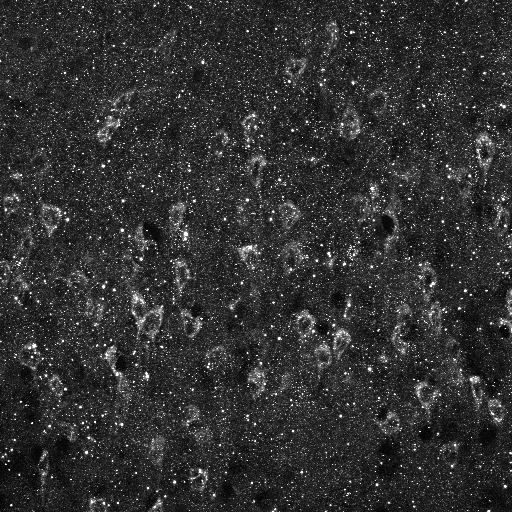

In [5]:
g.save('g.png')
img = Image.open('g.png').convert('L')
img

*Step 3: Applying gaussian filter to the image*

In [6]:
arr = np.array(img)

In [7]:
gauss_blur_images = mult.gauss_filter(arr, gauss_blur_list)

*Step 5: Obtaining histograms of the images*

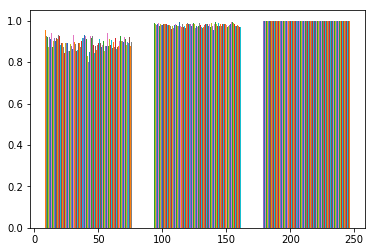

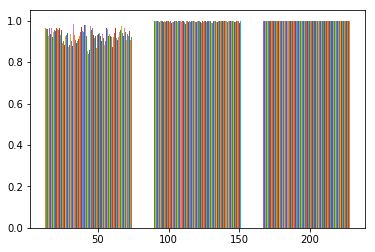

In [8]:
cumulative_Histograms = mult.cumulative_hist(gauss_blur_images, bin_list)

In [9]:
plt1=cumulative_Histograms[0]
plt2=cumulative_Histograms[1]

*Step 7: Computing difference histograms for each number of bins*

*To Do List:*
    2. create loops that peform the difference between two histograms
    3. Creat loops that creates the difference of consecutive blur histograms

In [10]:
#Function that takes the two histograms obtain heights for new histogram
heights = mult.diff_hist(plt1, plt2)

*Step X: Making bar chart of the new heights*

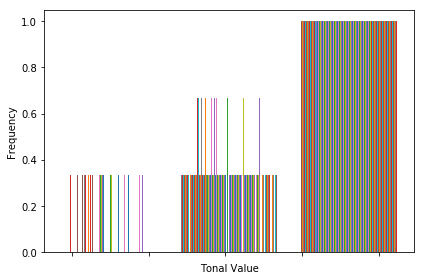

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 

ax1.hist(heights, bins=3, density = True, cumulative = True)
ax1.set_xlabel('Tonal Value')
ax1.set_ylabel('Frequency')
ax1.set_xticklabels([])

fig.tight_layout()